# Project: Investigate a Dataset - TMDB_Movie_Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The following project investigates a list of nearly 10,000 movies. It goes through their data as acquired from The Movie Database (TMDB) and we try to answer related questions based on the data. First, We introuduce, clean, and organize the dataset. Next, we start our analysis process by performing cloumns operations and visulatization of the data. In the end, we draw conclusions based on the observations from the graphs and results. Using these conclusions, we answer the employed questions and make predictions for the relations between the different attributes of any movie.   

### Dataset Description 

The following data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It contains different attributes of the movies, these attributes are discussed and descirbed in the following section.

<strong>The Dataset Columns:</strong>

<ol style=line-height:2;>

<li><em>id</em><br>This is the identification number given to the movie by the TMDb. We will keep using it as our index.</li>
<li><em>imdb_id</em><br> Id in the IMDB website. <span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase. </li>
<li><em>popularity</em><br> A popularity score for a movie</li>
<li><em>budget</em><br> The cost of making the movie (USD)</li>
<li><em>revenue</em><br> Total Revenue of the movie (USD)</li>
<li><em>original_title</em></li>
<li><em>cast</em></li>
<li><em>homepage</em><br> Homepage link of the move. <span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase.</li>
<li><em>director</em></li>
<li><em>tagline</em><br> Tagline of the movie. <span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase.</li>
<li><em>keywords</em><br><span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase.</li>
<li><em>overview</em><br> Description of the movie's plot. <span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase.</li>
<li><em>runtime</em><br> Length of the movie (minutes) <span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase.</li>
<li><em>genres</em><br></li>
<li><em>production_companies</em><br></li>
<li><em>release_date</em><br></li>
<li><em>vote_count</em><br> Number of users rated the movie</li>
<li><em>vote_average</em><br> Average rating of users</li>
<li><em>release_year</em><br> <span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase. As release date is enough and more informative. </li>
<li><em>budget_adj</em><br> The cost of making a movie in 2010 dollars (Accounting for inflation). <span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase.</li>
<li><em>revenue_adj</em><br>Total Revenue of the movie in 2010 dollars (Accounting for inflation). <span style=color:red;>We won't use it</span> and it'll be removed later in the cleaning phase.</li>

</ol>



### Question(s) for Analysis
We impose some questions and we try to asnwer them using the data in our hands. We can judge if a movie is successful or not by a simple index calculated from the following formula:<br>

Profit_margin = (Revenue/Budget - 1)<br>
Success_index =  profit_margin/avg.profit_margin + Rating/Avg.rating + popularity/avg.popularity<br>

This will give us an indication of if the the movie is both financially successful and liked by people. And this will help us answer the following questions:<br>

1 - What companies are production successful movies in some genres (Action, Crime, SciFi, and Thriller)? <br>
2 - Is there any relation between the budget of a movie and its success? Are expensive movies more successful?<br>
3 - Are revenues related to the cast? Who is the most success-attracting star?<br>

We will start digging into those questions, given data on the cast, budget, and revenues of the movies.

In [1]:
import pandas as pd, numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Import our movies data
movies = pd.read_csv('tmdb-movies.csv')
movies.set_index('id', inplace=True)

#number of unique values in each column
print(movies.nunique())

imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64



### Data Cleaning
 

#### Remove unnecessary columns that will not be used in our study

In [3]:
movies.drop(columns=['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj', 'runtime', 'keywords','release_year','director'], inplace=True);

print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   release_date          10866 non-null  object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 933.8+ KB
None


#### Remove Duplicated Rows

In [4]:
movies.duplicated().sum()

1

In [5]:
movies.drop_duplicates(inplace=True)

## Dealing with Null values

There are 2 columns that contain null values. Each column's null values will be removed at the required stage (or question) e.g. the cast null values will be removed when trying to answer the question related to the actors. For now, we will leave the null values as it is and it will be removed in later corresponding sections.<strong><em> This is because null values in actor column will not affect calculations on companies columns</em></strong>

However, we have movies will 0 budget and 0 revenues. We need to delete these movies are they produce errors while calculating success index.

In [6]:
movies = movies[movies.budget != 0.00]
movies = movies[movies.revenue != 0.00]

#Also remove movies with unrealistic values
movies = movies[500 < movies.budget]
movies = movies[500 < movies.revenue]

print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 135397 to 2161
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3819 non-null   float64
 1   budget                3819 non-null   int64  
 2   revenue               3819 non-null   int64  
 3   original_title        3819 non-null   object 
 4   cast                  3815 non-null   object 
 5   genres                3819 non-null   object 
 6   production_companies  3775 non-null   object 
 7   release_date          3819 non-null   object 
 8   vote_count            3819 non-null   int64  
 9   vote_average          3819 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 328.2+ KB
None


#### This significantly reduced our data size, but with out financial data of the movie, we won't be able to judge it.

## Adjusting Data in the columns for better manipulability

In [7]:
#Splitting Columns with '|' spacer. This function will be used more later.
def splt (series, y):
    return [list(str(x).split(y))  for x in series]

movies['release_date'] = splt(movies['release_date'],'/')

In [8]:
#Converting money to millions instead of dollars and rounding other columns
movies['budget'] = np.round(movies['budget']/1000000, decimals=2)
movies['revenue'] = np.round(movies['revenue']/1000000, decimals=2)


<a id='eda'></a>
## Exploratory Data Analysis

### Calculating Success Index



In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 135397 to 2161
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3819 non-null   float64
 1   budget                3819 non-null   float64
 2   revenue               3819 non-null   float64
 3   original_title        3819 non-null   object 
 4   cast                  3815 non-null   object 
 5   genres                3819 non-null   object 
 6   production_companies  3775 non-null   object 
 7   release_date          3819 non-null   object 
 8   vote_count            3819 non-null   int64  
 9   vote_average          3819 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 328.2+ KB


In [10]:
movies['profit_margin'] = movies['revenue']/movies['budget'] - 1
movies['success_index'] = movies['profit_margin']/movies['profit_margin'].mean() + \
movies['vote_average']/movies['vote_average'].mean() + \
movies['popularity']/movies['popularity'].mean()

### What companies are successful in each genre (Action, Romance, SciFi, and Thriller) ?

We will drop null values from the genres and companies columns. Then we will separate by Genre and Production Company:

In [11]:
companies = movies.dropna(subset=['production_companies', 'genres'])

companies['genres'] = splt(companies['genres'],'|')
companies['production_companies'] = splt(companies['production_companies'],'|')

companies = companies.explode(column='production_companies');

<ipython-input-11-4279aeb844de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['genres'] = splt(companies['genres'],'|')
<ipython-input-11-4279aeb844de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['production_companies'] = splt(companies['production_companies'],'|')


In [12]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10504 entries, 135397 to 2161
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10504 non-null  float64
 1   budget                10504 non-null  float64
 2   revenue               10504 non-null  float64
 3   original_title        10504 non-null  object 
 4   cast                  10502 non-null  object 
 5   genres                10504 non-null  object 
 6   production_companies  10504 non-null  object 
 7   release_date          10504 non-null  object 
 8   vote_count            10504 non-null  int64  
 9   vote_average          10504 non-null  float64
 10  profit_margin         10504 non-null  float64
 11  success_index         10504 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.0+ MB


Select 4 arbitary genres and separate them in new dataframes

In [13]:
action = companies[['Action' in x for x in companies['genres']]]
crime = companies[['Crime' in x for x in companies['genres']]]
scifi = companies[['Science Fiction' in x for x in companies['genres']]]
thriller = companies[['Thriller' in x for x in companies['genres']]]

Now, group each genre by company and calculate the mean success index for each company in the corrosponding genre.
A pie plot will be helpful to demosntrate the results.

In [14]:
def plt(gnre,knd,ttle):
    all_ = gnre.groupby('production_companies').mean().dropna()
    top = all_.sort_values(by=['success_index'], ascending=False).head(5)['success_index']
    top.plot(kind=knd, figsize=(10,10), title=ttle, legend=True, xlabel = 'Production Companies', ylabel= "Success Index")

    return top

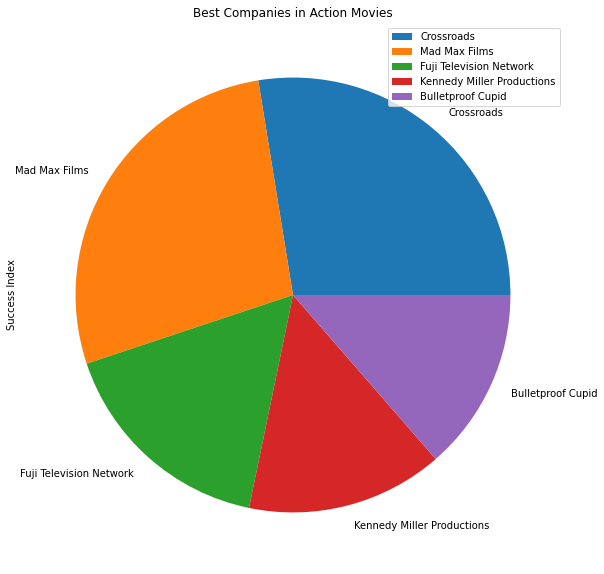

In [15]:
plt(action,'pie', 'Best Companies in Action Movies');

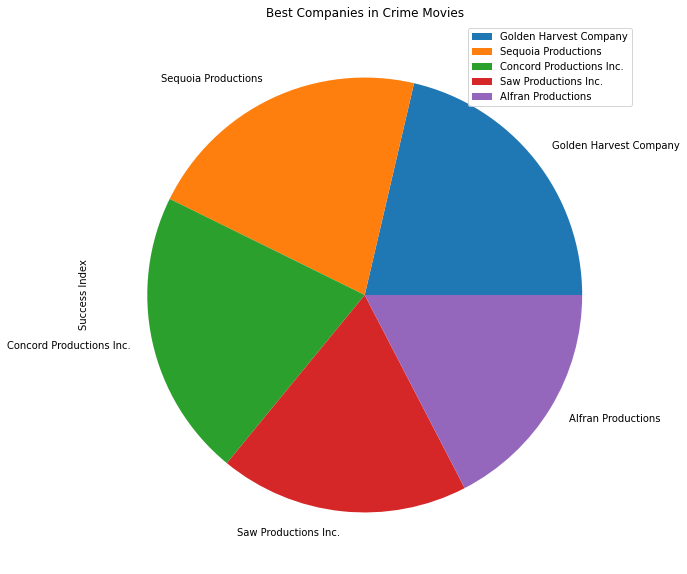

In [16]:
plt(crime,'pie', 'Best Companies in Crime Movies');

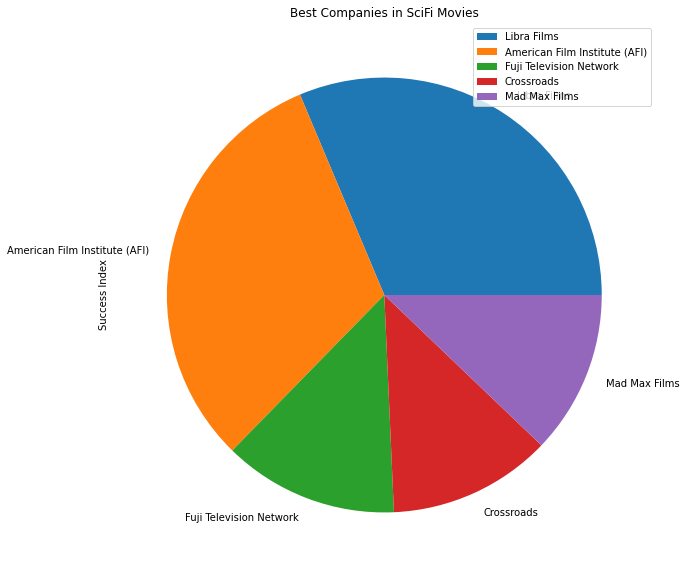

In [17]:
plt(scifi,'pie', 'Best Companies in SciFi Movies');
#matplotlib.plot.legend(bbox_to_anchor=(.45, 1.15), loc="upper center")


production_companies
Tremendum Pictures         43.589152
Management 360             43.589152
Plunge Pictures LLC        43.226751
Vortex                     40.129585
Fuji Television Network    29.490986
Name: success_index, dtype: float64

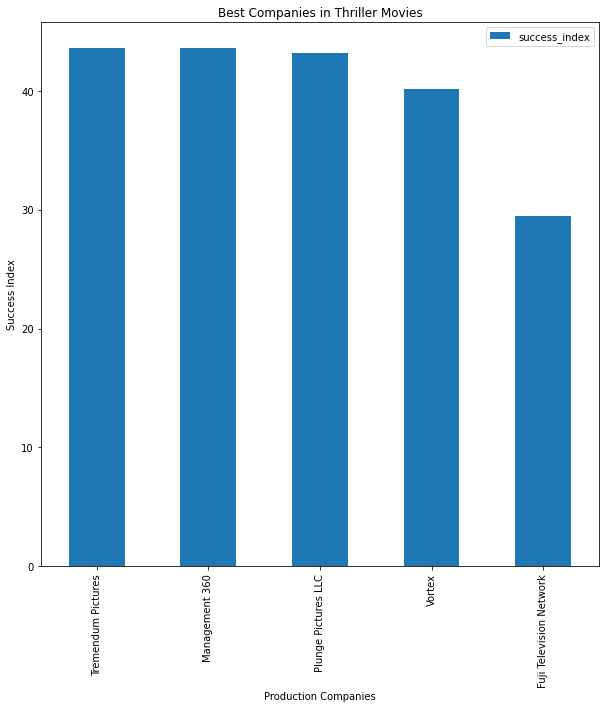

In [18]:
plt(thriller,'bar', 'Best Companies in Thriller Movies')

#### We can say with confidence that the previous top companies excel in specific genres and a movie is expected to succed if produced by these companies.

### Is there any relation between the budget of a movie and its success? Are expensive movies more successful?

                 budget   revenue  success_index
budget         1.000000  0.688365      -0.006522
revenue        0.688365  1.000000       0.049838
success_index -0.006522  0.049838       1.000000


<AxesSubplot:xlabel='budget', ylabel='revenue'>

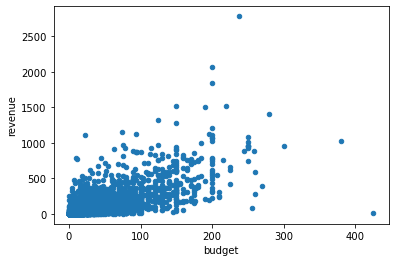

In [19]:
print(movies.loc[:,['budget', 'revenue', 'success_index']].corr())
movies.plot.scatter(x='budget',y='revenue')

#### It seems like there's not a strong relationship between budget and a movie's success. It is not neccessary for a movie, that is well-spent on by the production company, to be successful for the sole reason of being expensive. 

### Are revenues related to the cast? Who is the most success-attracting star?
Let's group the movies by the cast members.

In [20]:
#This long formula will give us the top 20 stars with movies with highest average success index, sorted by the latter.
actors = movies.dropna(subset=['cast'])
actors['cast'] = splt(actors['cast'],'|')

actors = actors.explode('cast').groupby('cast').mean().sort_values(by=['success_index'], ascending=False).head(20).loc[:,['revenue', 'success_index']]

print(actors)

                      revenue  success_index
cast                                        
Joshua Leonard       248.0000    1235.134349
Bob Griffith         248.0000    1235.134349
Heather Donahue      248.0000    1235.134349
Michael C. Williams  248.0000    1235.134349
Jim King             248.0000    1235.134349
Mark Fredrichs       193.3600     963.503971
Ashley Palmer        193.3600     963.503971
Micah Sloat          193.3600     963.503971
Amber Armstrong      193.3600     963.503971
Katie Featherston    179.8475     245.152639
Judith Roberts         7.0000      70.957091
Jeanne Bates           7.0000      70.957091
Allen Joseph           7.0000      70.957091
Charlotte Stewart      7.0000      70.957091
Divine                 6.0000      60.948426
Mary Vivian Pearce     6.0000      60.948426
Danny Mills            6.0000      60.948426
David Lochary          6.0000      60.948426
Stephen Siegel        28.5800      48.555285
Daryl Isaacs          28.5800      48.555285


<ipython-input-20-d563b8513073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors['cast'] = splt(actors['cast'],'|')


#### We can now see who are the best actors that make successful movies in all genres.

<a id='conclusions'></a>
## Conclusions

We showed which companies are more successful in each genre and how much of the market they take up. This doesn't neccessarly mean that every movie produced in the top companies in the corrosponding genre will be a success. 

The second thing we witnessed is that spending more money on a movie slightly affects its success. Success index and budget are not caustively correlated, but they have a weak positive relationship. However, it could the case that more budget results in more revenue, they are more correlated. This could be because that the marketing budget is higher and the movie is more spread around the world.

Last, we listed the top 20 actors who have acted in the highest movies with average success index. Again, we defined the success index as a combination between profit, user rating, and popularity. Some movies are financially successful but not popular and vice versa. 


### Limitations
<ul>
<li>The project aims to demonsrate data analysis abilities and the use of various tools to manipulate the data and visualize it.</li>
<li>success index as a combination between profit, user rating, and popularity. Some movies are financially successful but not popular and vice versa. </li>
